In [49]:
import os
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE 


import matplotlib.pyplot as plt
from src.config import Config
plt.style.use('ggplot')

In [32]:

def get_data(data_type:str):
    """
    this function : 
        imports data
        split data into training and test data with respect to the chosen parameters   

    Args:
        data_type (str): ["transformed","processed"] the type of data you want to import 

    Returns:
        [tuple]: containing (the original data , training set , testing set  )
    """
    
 
    merged_data= pd.read_csv(Config.data / f"{data_type}/labled_expression_dataset.csv",index_col=0)
    features=merged_data.iloc[:,2:]
    labels=merged_data["Class"]
    


    return merged_data,features,labels

In [33]:
labled_data_set,expression_level,labels=get_data("transformed")

# Dimensionality Reduction (PCA , UMAP)

## Principle Component Analysis (PCA)

In [34]:
labels

0      PRAD
1      LUAD
2      PRAD
3      PRAD
4      BRCA
       ... 
796    BRCA
797    LUAD
798    COAD
799    PRAD
800    PRAD
Name: Class, Length: 801, dtype: object

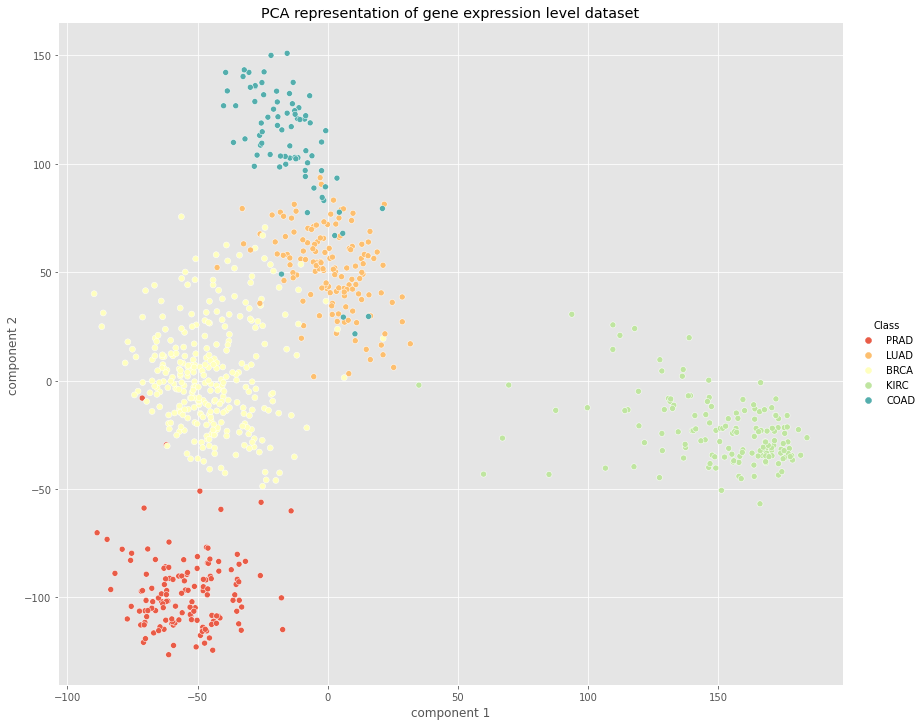

In [45]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(expression_level)
X_pca = pd.DataFrame(data = principalComponents)
X_pca = pd.concat([X_pca.reset_index().drop(['index'],axis=1),labels], axis=1)
sns.pairplot(x_vars=0, y_vars=1, data=X_pca, hue="Class",palette="Spectral",height=10,aspect=1.2)

plt.title('PCA representation of gene expression level dataset')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

The PCA representation shows a remarkable separation of different tumor type .which means that gene expression profiles explain well the variability due the phenotype : Tumor type .    

## Uniform Manifold Approximation and Projection for Dimension Reduction (UMAP)

/home/ali/anaconda3/envs/ML_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ali/anaconda3/envs/ML_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ali/anaconda3/envs/ML_env/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


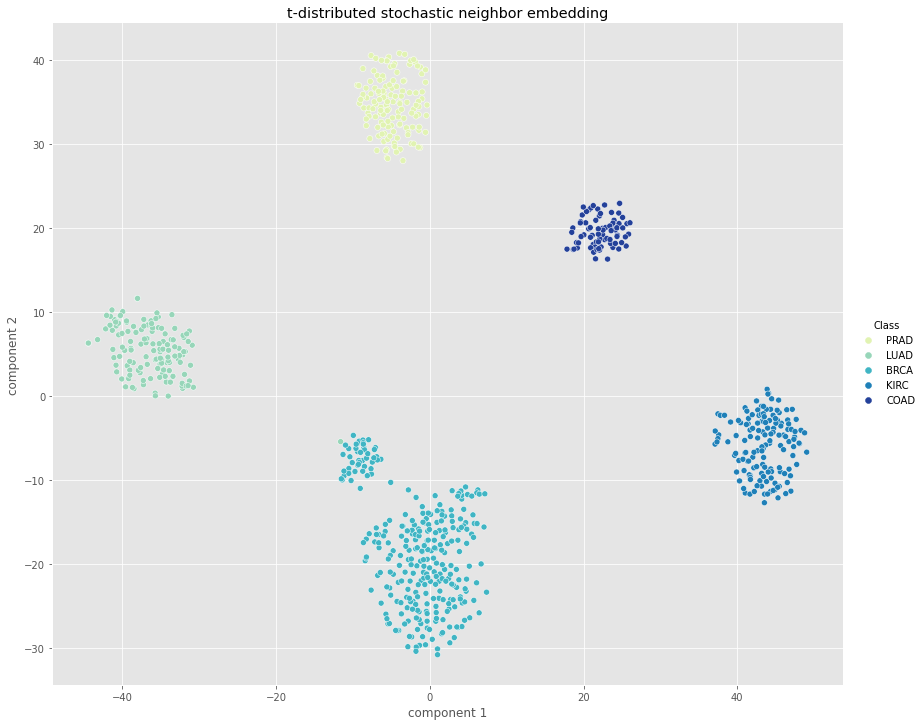

In [52]:
X_tsne = TSNE(n_components=2).fit_transform(expression_level)
X_tsne = pd.DataFrame(data = X_tsne)
X_tsne = pd.concat([X_tsne.reset_index().drop(['index'],axis=1),labels], axis=1)
sns.pairplot(x_vars=0, y_vars=1, data=X_tsne, hue="Class",palette="YlGnBu",size=10,aspect=1.2)

plt.title('t-distributed stochastic neighbor embedding')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

Surprisingly , we observe a sub cluster within BRCA cluster 